<div style="text-align: right"> Provided on April 1 and due on April 15 [BRI516, Spring/2020] </div>

For homework in general:
* Install `Anaconda` and create a python environment with `NumPy`, `Pandas`, `Matplotlib`, `scikit-learn` in Python >= 3.5 
* Visualize the results of the code as much as possible and add comments/description on the code/results
* Please upload your jupyter-notebook file for homework to `Blackboard`

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### [HW#1] Perceptron, logistic regression, and support vector machine

#### 1. Load the Iris data ('iris.csv') using Pandas


In [2]:
df = pd.read_csv('iris.csv',header=None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# checking the data structure
print(df.info())
print(df[4].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
0    150 non-null float64
1    150 non-null float64
2    150 non-null float64
3    150 non-null float64
4    150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB
None
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


2. Divide the overall samples (n=150) into 80% for training and 20% for test

### (a) Using the scikit-learn's `train_test_split` class with a `stratify` option

In [4]:
# divide dataframe as X and y
X = df.iloc[:,[0,2]].values # choose two features
y = df.iloc[:,4].values

# cast y as int labels by using sklearn label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# using sklearn's train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y)

In [5]:
# check the results
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

(120, 2) (30, 2) (120,) (30,)
Labels counts in y_train: [40 40 40]
Labels counts in y_test: [10 10 10]


### (b) Implement your own class, `my_train_test_split` with a `stratify` option available


In [6]:
# implement my_train_test_split
class my_train_test_split(object):
    def my_train_test_split(X, y, test_size=0.2, stratify=y):
        # split : stratified
        unq, cnt = np.unique(stratify,return_counts=True) # 3types,50,50,50 
        ts_bn = int(cnt[0] * test_size) # 50*0.2 = 10
        tr_bn = int(ts_bn*4) # 40
        tr_idx = np.zeros((tr_bn*unq.shape[0]),dtype=int)
        ts_idx = np.zeros((ts_bn*unq.shape[0]),dtype=int)

        for i,name in enumerate(unq):
            b_idx = np.where(y == name)[0] # 50
            # shuffle
            np.random.shuffle(b_idx)

            tr_idx[i*tr_bn:(i+1)*tr_bn] = b_idx[ts_bn:]
            ts_idx[i*ts_bn:(i+1)*ts_bn] = b_idx[:ts_bn]
        # decision boundary plot 을 그릴 때 사용하기 위해 test set index도 return
        return X[tr_idx], X[ts_idx], y[tr_idx], y[ts_idx], ts_idx

X_train_m, X_test_m, y_train_m, y_test_m, ts_idx = my_train_test_split.my_train_test_split(X,y, test_size=0.2, stratify=y)

In [7]:
# check the results
print(X_train_m.shape, X_test_m.shape, y_train_m.shape, y_test_m.shape)
print('Labels counts in y_train:', np.bincount(y_train_m))
print('Labels counts in y_test:', np.bincount(y_test_m))

(120, 2) (30, 2) (120,) (30,)
Labels counts in y_train: [40 40 40]
Labels counts in y_test: [10 10 10]


#### (c) Compare the results from (a) and (b) 
- (a)와 (b)의 결과 모두 stratify 옵션이 잘 적용되어서 train, test set이 나누어졌다.

<br>

※ In 3~5, either is fine to use train/test sets from 'train_test_split' or 'my_train_test_split'


3. Apply the Perceptron model to classfy the three flower classes as good as possible

#### (a) Using the class, `Perceptron` in scikit-learn 

In [8]:
# my_train_test_split으로 나누어진 데이터셋 사용하기로 하였다
del X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = X_train_m, X_test_m, y_train_m, y_test_m

In [31]:
# function define for plotting decision boundary
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape) # reshape the predicted class labels z into a grid with the same dimensions as xx1 and xx2
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap) # draw a contour plot via Matplotlib's contourf function
    plt.xlim(xx1.min(), xx1.max()) # maps the different decision regions to different colors
    plt.ylim(xx2.min(), xx2.max()) # for each predicted class in the grid array

    # plot samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8,
                    c=colors[idx], marker=markers[idx], label=cl,
                    edgecolor='black')
        
    # highlight test samples
    if test_idx is not None:
        # plot all samples
        X_test, y_test = X[test_idx,:], y[test_idx]
        
        plt.scatter(X_test[:,0],X_test[:,1],
                   c='',edgecolor='black',alpha=1.0,
                   linewidth=1, marker='o',
                   s=100, label='test set')
    plt.xlabel('feature 1')
    plt.ylabel('feature 2')
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

In [26]:
from sklearn.linear_model import Perceptron
clf = Perceptron() # use default options
clf.fit(X_train, y_train) # fit the train data
print('train score:',clf.score(X_train, y_train))
print('test score:',clf.score(X_test, y_test))

train score: 0.8666666666666667
test score: 0.7666666666666667


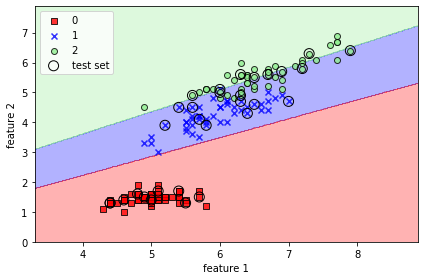

In [32]:
plot_decision_regions(X, y, test_idx=ts_idx, classifier=clf)

#### (b) Using the class, `SGDClassifier` in scikit-learn: implement stochastic gradient algorithm of the Perceptron using the `partial_fit` method of this class for a varying mini-batch sizes (i.e., mini-batch size = 1, 2, 10)

In [37]:
from sklearn.linear_model import SGDClassifier

In [55]:
def var_batch_size_per_plot(batch_size = 2,eta0=1e-03,epochs=150): 
    clf = SGDClassifier(loss='perceptron',random_state=1,
                                     eta0=eta0, penalty='l1') 
    ntrain = X_train.shape[0]
    batch_num = int(ntrain / batch_size)
    classes = np.unique(y_train)
    tr_err = np.zeros((epochs))
    ts_err = np.zeros((epochs))
    weights = np.zeros((epochs,3,2))
    # epoch
    for epoch in range(epochs):
        randpermlist = np.random.permutation(ntrain)
        for i in range(batch_num):
            randidx = randpermlist[i*batch_size:min((i+1)*batch_size, ntrain-1)]
            batch_x, batch_y = X_train[randidx], y_train[randidx]
            # partial_fit
            clf.partial_fit(batch_x, batch_y,classes=classes)
        # get weights
        weights[epoch] = clf.coef_
        # get costs
        tr_err[epoch] = np.sum(clf.predict(X_train) != y_train)
        ts_err[epoch] = np.sum(clf.predict(X_test) != y_test)
    return clf, weights, tr_err, ts_err

In [53]:
# define error and weight plot
def plot_er(tre_,tse_,weights_):
    l=[]
    epochs = weights_.shape[0]
    for i in range(1,epochs):
        l.append(np.average(weights_[i] - weights_[i-1]))
    f,axes = plt.subplots(1,2, figsize=(16,6))
    ax = axes.flat
    ax[0].plot(tre_,label='train error')
    ax[0].plot(tse_,label='test error')
    ax[0].set_xlabel('epochs')
    ax[0].set_ylabel('error')
    ax[0].legend(loc='upper left')
    ax[0].set_title('train & test error')
    ax[1].plot(l)
    ax[1].set_xlabel('epochs')
    #ax[1].set_ylabel('weights')
    ax[1].set_title('Updated weights average')
    plt.show()

3 mini-batch
train score: 0.975
test score: 0.8666666666666667


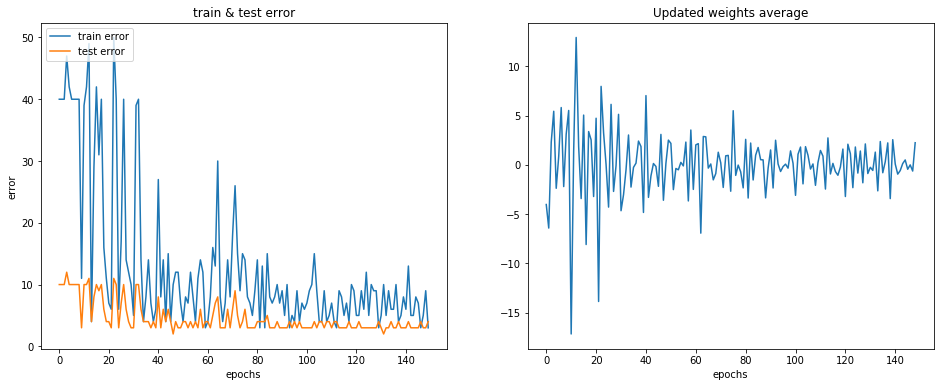

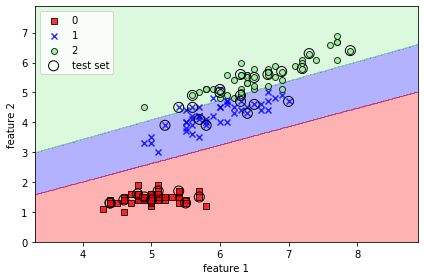

20 mini-batch
train score: 0.9333333333333333
test score: 0.9


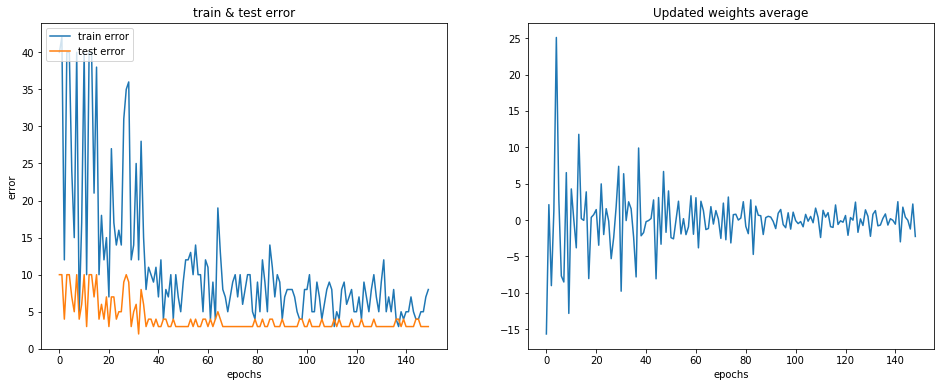

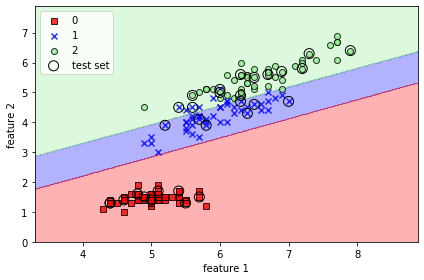

100 mini-batch
train score: 0.975
test score: 0.8666666666666667


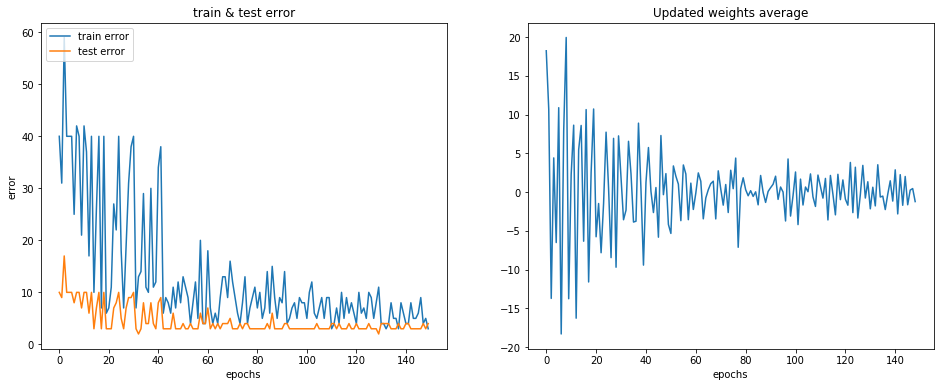

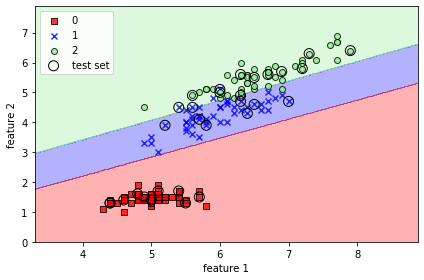

In [56]:
# Each score and weights plot when mini-batch size = 3,20,100
for b_size in [3,20,100]:
    clf_, weights_, tre_, tse_ = var_batch_size_per_plot(batch_size=b_size,eta0=0.001,epochs=150)
    print(b_size, 'mini-batch')
    print('train score:',clf_.score(X_train, y_train))
    print('test score:',clf_.score(X_test, y_test))
    plot_er(tre_,tse_,weights_)
    plot_decision_regions(X, y, test_idx=ts_idx, classifier=clf_)

#### (c) Discuss the results from (a) and (b)
- (a)와 (b)를 비교해보면, mini-batch와 stochastic gradient descent 를 활용하여 모델을 최적화(optimize) 시킨 perceptron 모델이 더 좋은 성능을 내는 것으로 보인다.
- ((b)의 train, test error 가 줄어드는 것과 weight의 변화가 수렴하는 것을 확인할 수 있다.)

<br>

4. Apply the logistic regression (LR) model to classfy the three flower classes as good as possible

(a) Using the class, `LogisticRegression` in scikit-learn 


(b) Using the class, `SGDClassifier` in scikit-learn: implement stochastic gradient algorithm of the Perceptron using the `partial_fit` method of this class for a varying mini-batch sizes (i.e., mini-batch size = 1, 2, 10)

(c) Discuss the results from (a) and (b)


In [57]:
# 4.(a)
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='liblinear',
                        multi_class='auto').fit(X_train, y_train)
clf.fit(X_train, y_train) # fit the train data
print('train score:',clf.score(X_train, y_train))
print('test score:',clf.score(X_test, y_test))

train score: 0.925
test score: 0.9


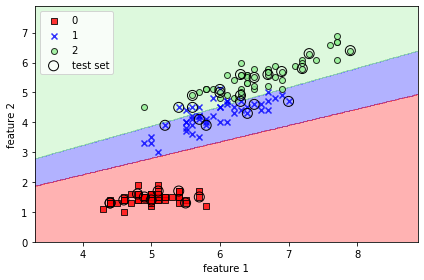

In [58]:
plot_decision_regions(X, y, test_idx=ts_idx, classifier=clf)

In [72]:
# 4.(b)
def var_batch_size_log_plot(batch_size = 2,eta0=0.001,epochs=150): 
    clf = SGDClassifier(loss='log',random_state=1,penalty='l1',eta0=eta0) 
    ntrain = X_train.shape[0]
    batch_num = int(ntrain / batch_size)
    classes = np.unique(y_train)
    tr_err = np.zeros((epochs))
    ts_err = np.zeros((epochs))
    weights = np.zeros((epochs,3,2))
    for epoch in range(epochs):
        randpermlist = np.random.permutation(ntrain)
        for i in range(batch_num):
            randidx = randpermlist[i*batch_size:min((i+1)*batch_size, ntrain-1)]
            batch_x, batch_y = X_train[randidx], y_train[randidx]
            clf.partial_fit(batch_x, batch_y,classes=classes)
        # get weights
        weights[epoch] = clf.coef_
        # get costs
        tr_err[epoch] = np.sum(clf.predict(X_train) != y_train)
        ts_err[epoch] = np.sum(clf.predict(X_test) != y_test)
    return clf, weights, tr_err, ts_err

3 mini-batch
train score: 0.9416666666666667
test score: 0.9


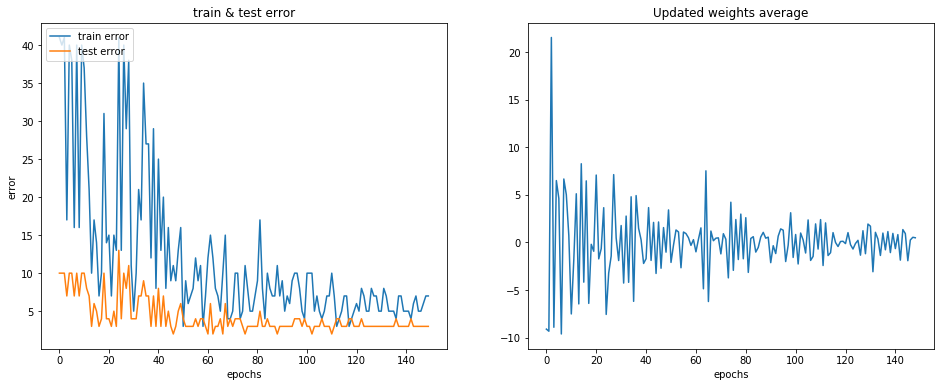

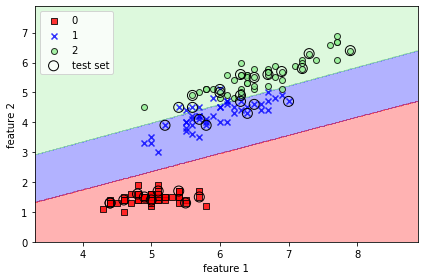

20 mini-batch
train score: 0.9666666666666667
test score: 0.8666666666666667


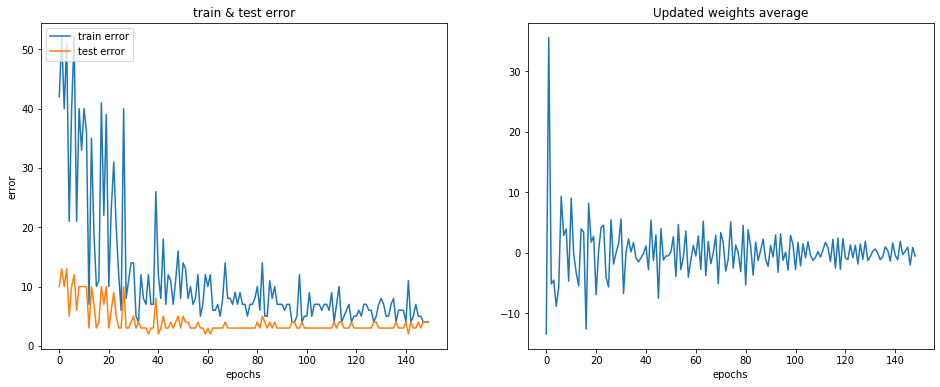

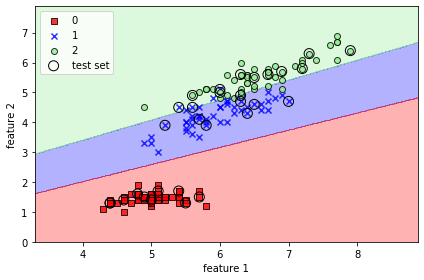

100 mini-batch
train score: 0.9583333333333334
test score: 0.9


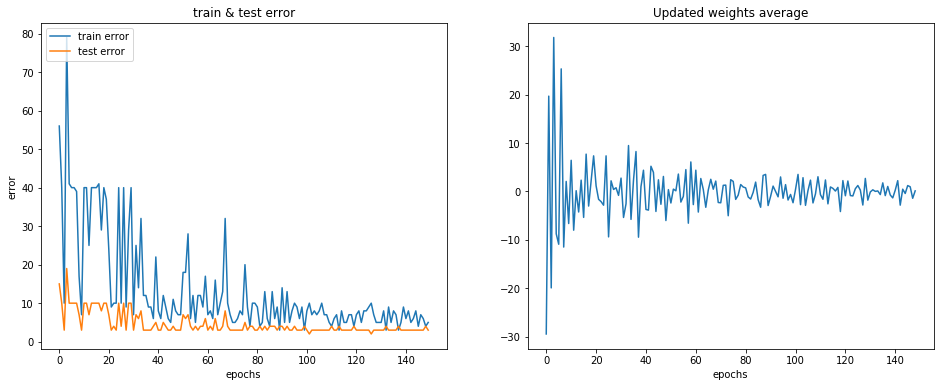

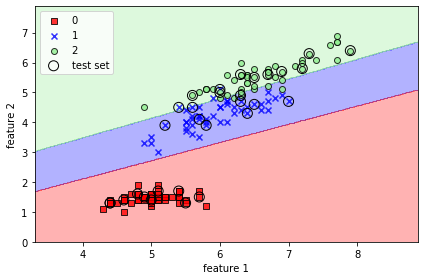

In [73]:
# Each score and weights plot when mini-batch size = 3,20,100
for b_size in [3,20,100]:
    clf_, weights_, tre_, tse_ = var_batch_size_log_plot(batch_size=b_size,eta0=0.00001,epochs=150)
    print(b_size, 'mini-batch')
    print('train score:',clf_.score(X_train, y_train))
    print('test score:',clf_.score(X_test, y_test))
    plot_er(tre_,tse_,weights_)
    plot_decision_regions(X, y, test_idx=ts_idx, classifier=clf_)

### 4.(c)
- (a)와 (b)를 비교해보면, SGD 방법을 사용하지 않은 logistic regression 도 잘 작동하고 SGD 방법을 적용하여도 잘 작동한다. (b)에서 mini-batch 크기가 더 작을 때가 더 좋은 성능을 보이는 것 같다.
- ((b)의 train, test error 가 줄어드는 것과 weight의 변화가 수렴하는 것을 확인할 수 있다.)

<br>

5. Apply the support vector machine (SVM) model to classfy the three flower classes as good as possible

(a) Using the class, `SVC` in scikit-learn 


(b) Using the class, `SGDClassifier` in scikit-learn: implement stochastic gradient algorithm of the Perceptron using the `partial_fit` method of this class for a varying mini-batch sizes (i.e., mini-batch size = 1, 2, 10)

(c) Discuss the results from (a) and (b)


In [66]:
# 5.a
from sklearn.svm import SVC
clf = SVC(gamma='auto')
clf.fit(X_train, y_train) # fit the train data
print('train score:',clf.score(X_train, y_train))
print('test score:',clf.score(X_test, y_test))

train score: 0.95
test score: 0.9666666666666667


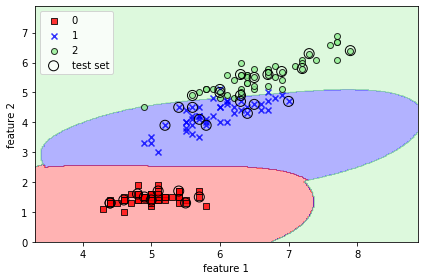

In [67]:
plot_decision_regions(X, y, test_idx=ts_idx, classifier=clf)

In [70]:
# 5.(b)
def var_batch_size_svm_plot(batch_size = 2,eta0=0.001,epochs=150): 
    clf = SGDClassifier(loss='hinge',random_state=1,penalty='l1',eta0=eta0) 
    ntrain = X_train.shape[0]
    batch_num = int(ntrain / batch_size)
    classes = np.unique(y_train)
    tr_err = np.zeros((epochs))
    ts_err = np.zeros((epochs))
    weights = np.zeros((epochs,3,2))
    for epoch in range(epochs):
        randpermlist = np.random.permutation(ntrain)
        for i in range(batch_num):
            randidx = randpermlist[i*batch_size:min((i+1)*batch_size, ntrain-1)]
            batch_x, batch_y = X_train[randidx], y_train[randidx]
            clf.partial_fit(batch_x, batch_y,classes=classes)
        # get weights
        weights[epoch] = clf.coef_
        # get costs
        tr_err[epoch] = np.sum(clf.predict(X_train) != y_train)
        ts_err[epoch] = np.sum(clf.predict(X_test) != y_test)
    return clf, weights, tr_err, ts_err

3 mini-batch
train score: 0.9583333333333334
test score: 0.9


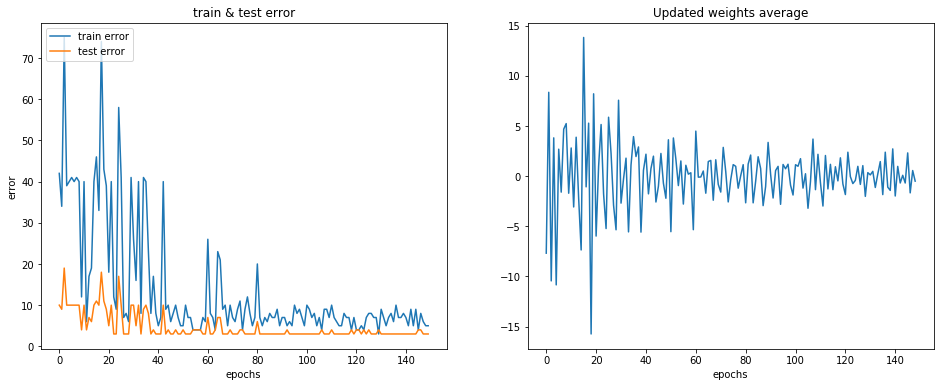

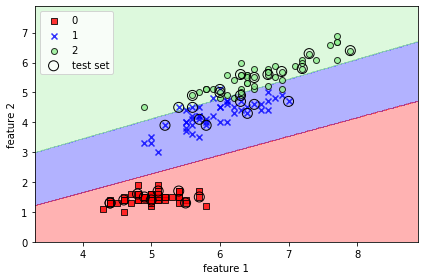

20 mini-batch
train score: 0.9666666666666667
test score: 0.8666666666666667


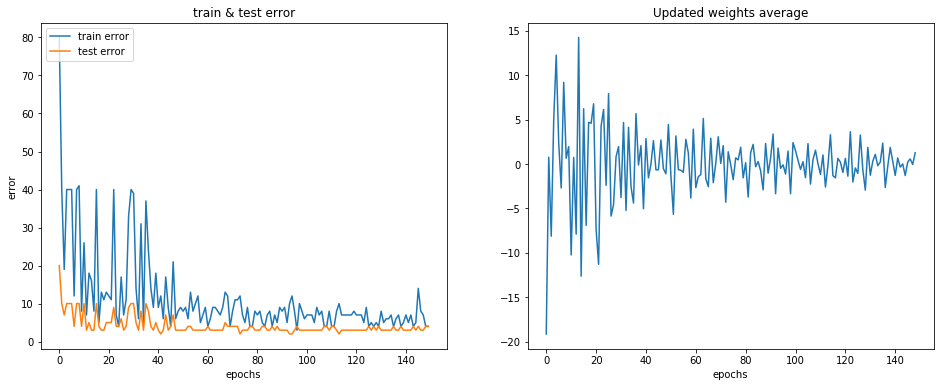

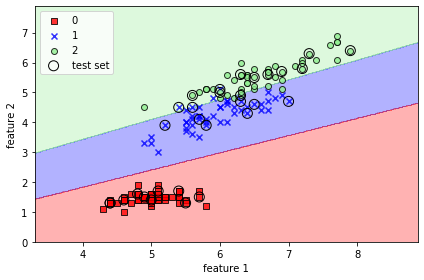

100 mini-batch
train score: 0.9666666666666667
test score: 0.8666666666666667


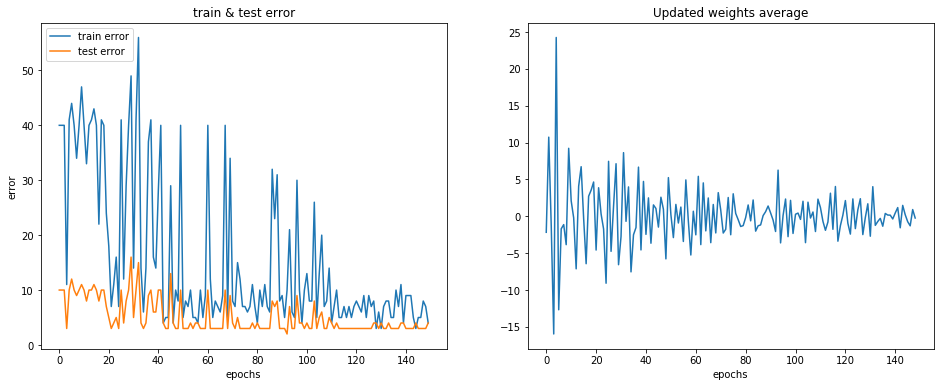

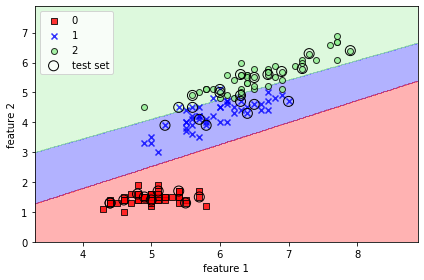

In [74]:
# Each score and weights plot when mini-batch size = 3,20,100
for b_size in [3,20,100]:
    clf_, weights_, tre_, tse_ = var_batch_size_svm_plot(batch_size=b_size,eta0=0.00001,epochs=150)
    print(b_size, 'mini-batch')
    print('train score:',clf_.score(X_train, y_train))
    print('test score:',clf_.score(X_test, y_test))
    plot_er(tre_,tse_,weights_)
    plot_decision_regions(X, y, test_idx=ts_idx, classifier=clf_)

### 5.c
- (a)와 (b)를 비교해보면, (a)의 rbf kernel을 적용한 SVM은 커널형의 결정경계를 만들며 좋은 성능을 낸다. (b)는 linear한 결정경계를 만들며 역시 좋은 성능을 낸다고 할 수 있다.
- ((b)의 train, test error 가 줄어드는 것과 weight의 변화가 수렴하는 것을 확인할 수 있다.)


<br>

### 6. Discuss the results from (3) to (5)

- 3,4,5를 비교할 때 rbf kernel을 사용한 SVM classifier가 가장 좋은 test score를 냈다.
- 또한, perceptron에 기초하여 sigmoid activation 함수를 적용한 logistic regression(4번)이 perceptron(3번)의 결과와 비교했을 때 전반적으로 더 나은 성능을 보이는 것 같다.
- mini-batch stochastic gradient descent 방법은 확률적 방법을 사용하여 계산 비용을 줄일 수 있으며 효과적으로 모델을 최적화시킬 수 있다.

Notes:
* Students are supposed to set hyperparams (such as number of epochs) on their own
* For each of the classification tests, show the following: <br>
(a) learning curves (along epochs) of the cost/error from the training and test data where applicable <br>
(b) learning curves (along epochs) of average weight update term for each epoch (i.e., $\Delta w$) <br>
(c) decision boundary of the trained model along with training and test samples in the scatter plot

* Draw plots using matplotlib

* Please discuss each of your results with at least few lines of text